# ARTIFICIAL NEURAL NETWORKS :

Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

In [2]:
# LOADING DATA :
import pandas as pd
data=pd.read_csv("Alphabets_data.csv")

In [3]:
data


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
# DESCRIBING DATA SUMMARY OF ALL NUMERICAL COLUMNS .
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
# DESCRIBING OBJECT COLUMNS :
data.describe(include="object")

,letter
count,20000
unique,26
top,U
freq,813


In [6]:
# INFO ABOUT NOT NULL VALUE IN EACH COLUMN AND ITS DATATYPE :
data.info()
# TOTAL 17 COLUMNS.
# LETTER COLUMN IS OBJECT.
# AND ALL OTHER COLUMNS ARE NUMERIC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
# CHECKING FOR NULL VALUES :
data.isna().sum()
# THERE IS NO NULL VALUES


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
# CHECKING FOR DUPLICATES RECORDS :
data.duplicated().sum()
# THERE ARE 1332 RECORDS ARE DUPLICATED.

1332

# LABEL ENCODING :

In [9]:
from sklearn.preprocessing import LabelEncoder
# CREATING INSTANCE FOR labelEncoder :
LE=LabelEncoder()


In [10]:
LE

LabelEncoder()

In [11]:
# FIT TRANSFORM LETTER COLUMN :
data["encoded_letters"]=LE.fit_transform(data["letter"])

In [12]:
data.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,encoded_letters
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6


In [13]:
# STANDARDISING DATA :
from sklearn.preprocessing import StandardScaler
# CREATING INSTANCE :
SC=StandardScaler()

# STANDARDISING DATA EXCLUDING ENCODED TARGET VARIABLE :
standard_data=SC.fit_transform(data.drop(columns=["encoded_letters","letter"],axis=1))


In [14]:
# CONVERTING INTO DATAFRAME :
columns=["xbox","ybox","width","height","onpix","xbar","ybar","x2bar","y2bar","xybar","x2ybar","xy2bar","xedge","xedgey","yedge","yedgex"]
standard_data=pd.DataFrame(standard_data,columns=columns)

In [15]:
# ADDING THE TARGET VARIABLE INTO STANDARD DATAFRAME :
standard_data[["letter","encoded_letters"]]=data[["letter","encoded_letters"]].copy()

In [16]:
# NOW DATASET IS READY :
standard_data

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter,encoded_letters
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911,T,19
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441,I,8
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176,D,3
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911,N,13
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441,G,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354,D,3
19996,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354,C,2
19997,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149,T,19
19998,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911,S,18


In [17]:
# SPLITING THE DATA INTO X AND Y
x=standard_data.iloc[:, :-2]
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


In [18]:
y=standard_data.iloc[:,-1]
y

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: encoded_letters, Length: 20000, dtype: int32

# SPLITING THE DATA INTO TRAINING AND TESTING :

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# MODEL IMPLEMENTATION :

In [20]:
! pip install tensorflow


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
# DEFINING THE ANN MODEL :
import numpy as np
num_classes = len(np.unique(ytrain)) # Get the number of unique classes in ytrain
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),  # Input layer | shape[1]means no.of columns
    layers.Dense(64, activation='relu'),                                  # Hidden layer
    layers.Dense(num_classes, activation='softmax')])                  # output layer for multiclass classification

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# COMPILING THE MODEL :
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# TRAINING THE MODEL :
model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_split=0.1)
# An epoch refers to one complete pass through the entire training dataset.

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3590 - loss: 2.3260 - val_accuracy: 0.7244 - val_loss: 0.9807
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.8491 - val_accuracy: 0.7862 - val_loss: 0.7321
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.6229 - val_accuracy: 0.8269 - val_loss: 0.5969
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.5173 - val_accuracy: 0.8431 - val_loss: 0.5197
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.4288 - val_accuracy: 0.8569 - val_loss: 0.4651
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3908 - val_accuracy: 0.8737 - val_loss: 0.4220
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3310 - val_accuracy: 0.8806 - val_loss: 0.3812
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.2979 - val_accuracy: 0.

In [25]:
lose,accuracy=model.evaluate(xtest,ytest)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8964 - loss: 0.3153


In [26]:
# MAKING PREDICTION :
predictions = model.predict(xtest)

predictions

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[6.8104697e-12, 1.6438149e-05, 5.0900478e-08, ..., 2.0855399e-08,
        1.7008486e-10, 1.2034672e-10],
       [1.3417958e-10, 4.8906324e-05, 1.1393415e-09, ..., 7.4500377e-07,
        2.1483932e-09, 6.5342076e-10],
       [2.4022031e-09, 9.3881956e-18, 5.3631388e-06, ..., 1.6579050e-07,
        2.3304936e-02, 4.8324695e-23],
       ...,
       [6.3942338e-07, 6.4977069e-17, 2.9305574e-09, ..., 6.1952423e-06,
        1.2431387e-03, 2.0709111e-20],
       [9.8170024e-01, 7.6664456e-12, 1.2044570e-12, ..., 2.8524198e-06,
        4.1268386e-13, 1.0178345e-02],
       [9.8828214e-01, 1.0139268e-11, 1.0104816e-09, ..., 5.1886898e-05,
        3.6862839e-12, 1.1518067e-10]], dtype=float32)

In [27]:
# TO CONVERT PREDICTED PROBABILITY INTO CLASS LABELS :
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)

In [28]:
predicted_classes# yhat

array([ 3,  3, 21, ..., 20,  0,  0], dtype=int64)

In [29]:
# CALCULATING ACCURACY | PRECISION | RECALL | F1 SCORE :
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(ytest,predicted_classes)
precision=precision_score(ytest,predicted_classes,average="weighted")
recall=recall_score(ytest,predicted_classes,average="weighted")
f1_score=f1_score(ytest,predicted_classes,average="weighted")

In [30]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")

accuracy : 0.90525
precision : 0.908094558299086
recall : 0.90525
f1_score : 0.9055602508240909


# **HYPER PARAMETER TUNING :**

In [32]:
import tensorflow as tf # Import tensorflow
from tensorflow.keras import layers, models

In [33]:
# Build the ANN model with new hyperparameter
model2 = models.Sequential([
    layers.InputLayer(input_shape=(xtrain.shape[1],)),
    layers.Dense(64, activation='relu'),   # hiddne layer
    layers.Dense(32, activation='relu'),     # hiddne layer
    layers.Dense(26, activation='softmax')  # 26 output units for 26 alphabets
])

C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [34]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
history = model2.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=20, batch_size=32)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3120 - loss: 2.4784 - val_accuracy: 0.6938 - val_loss: 1.0710
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7292 - loss: 0.9582 - val_accuracy: 0.7717 - val_loss: 0.7859
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.7193 - val_accuracy: 0.8098 - val_loss: 0.6535
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.5992 - val_accuracy: 0.8235 - val_loss: 0.5759
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.5107 - val_accuracy: 0.8472 - val_loss: 0.5091
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8648 - loss: 0.4605 - val_accuracy: 0.8547 - val_loss: 0.4731
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8823 - loss: 0.3981 - val_accuracy: 0.8660 - val_loss: 0.4309
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8915 - loss: 0.3694 - val_accuracy: 0.

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(xtest,ytest)
print(f"Test Accuracy: {test_accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.2632
Test Accuracy: 0.9185000061988831


In [37]:
# Predict the labels for the test set
y_pred = model2.predict(xtest)
y_pred_classes = y_pred.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_opt = accuracy_score(ytest, y_pred_classes)
precision_opt = precision_score(ytest, y_pred_classes, average='weighted')
recall_opt = recall_score(ytest, y_pred_classes, average='weighted')
f1_opt = f1_score(ytest, y_pred_classes, average='weighted')
# ACCURACY,PRECISION,RECALL,F1_SCORE

In [39]:
print(f"Accuracy: {accuracy_opt}")
print(f"Precision: {precision_opt}")
print(f"Recall: {recall_opt}")
print(f"F1 Score: {f1_opt}")

Accuracy: 0.9185
Precision: 0.919753882172181
Recall: 0.9185
F1 Score: 0.9184783748373466


In [40]:
# THE PERFORMANCE OF MODEL HAS BEEN INCREASED...

In [41]:
# CLASSIFICATION REPORT :
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_classes, target_names=LE.classes_))

              precision    recall  f1-score   support

           A       0.95      0.99      0.97       162
           B       0.86      0.88      0.87       152
           C       0.92      0.92      0.92       144
           D       0.82      0.96      0.89       156
           E       0.86      0.95      0.90       139
           F       0.93      0.87      0.90       144
           G       0.94      0.84      0.89       154
           H       0.84      0.85      0.85       146
           I       0.89      0.91      0.90       138
           J       0.95      0.91      0.93       141
           K       0.87      0.88      0.88       137
           L       0.96      0.95      0.95       139
           M       0.93      0.95      0.94       145
           N       0.95      0.89      0.92       161
           O       0.94      0.89      0.92       173
           P       0.92      0.92      0.92       174
           Q       0.92      0.92      0.92       159
           R       0.88    

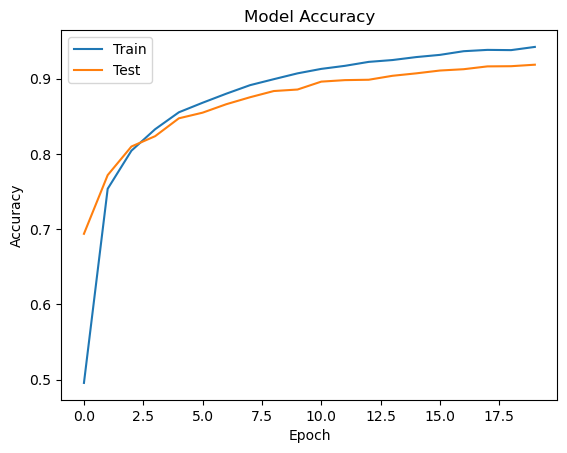

In [42]:
# PLOTING TRAING AND VALIDATING ACCURACY :

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

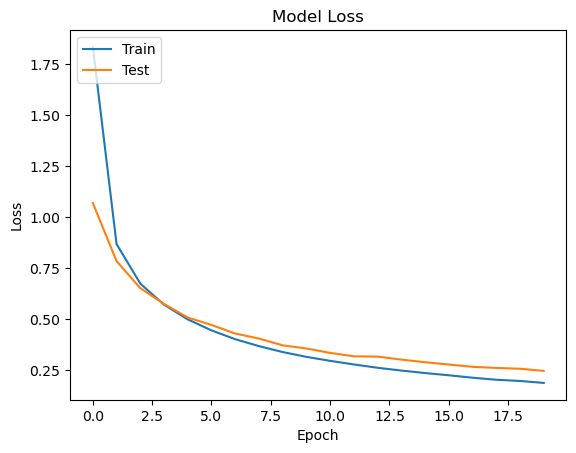

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CONCLUTION :
**BEFORE HYPER PARAMETER TUNING MODEL TEST ACCUARACY WAS :**

accuracy : 0.90625

precision : 0.9086136922005539

recall : 0.90625

f1_score : 0.9062969318707883

**AFTER HYPERPARAMETER TUNING MODEL TRAINING ACCUARACY IS :**

Accuracy: 0.92225

Precision: 0.9237179432338406

Recall: 0.92225

F1 Score: 0.9223255910537651

# MODEL ACCUARACY IS GOOD ENOUGH

### After Hyperparameter Tuning:
- **Accuracy: 0.92225**: The model correctly predicted about **92%** of the cases.
- **Precision: 0.9237**: When the model predicted a positive case, it was correct about **92%** of the time.
- **Recall: 0.92225**: The model successfully identified **92%** of all actual positive cases.
- **F1 Score: 0.9223**: This score shows that the model has a good balance between precision and recall at about **92%**.

### Summary:
The model is now better at making predictions, correctly classifying more instances and accurately identifying positive cases.